# Linear Regression Tests

## Simple Linear Regression (Two Variables)

Linear regression assumes a linear or straight line relationship between the input variables ($X$)
and the single output variable ($y$). More specifically, that output ($y$) can be calculated from a
linear combination of the input variables ($X$). When there is a single input variable, the method
is referred to as a simple linear regression.

In simple linear regression we can use statistics on the training data to estimate the coefficients
required by the model to make predictions on new data. The line for a simple linear regression
model can be written as:

\begin{equation*}
y = b_0 + b_1 \times x
\end{equation*}

Where $b_0$ and $b_1$ are the coeffcients we must estimate from the training data. Once the
coefficients are known, we can use this equation to estimate output values for $y$ given new input
examples of $x$. The technique requires that you calculate statistical properties from the data such as mean,
variance and covariance.

In [1]:
# Contrived dataset
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

In [2]:
import matplotlib.pyplot as plt 
from pprint import pprint
import scipy.stats
%matplotlib inline


<function matplotlib.pyplot.show(*args, **kw)>

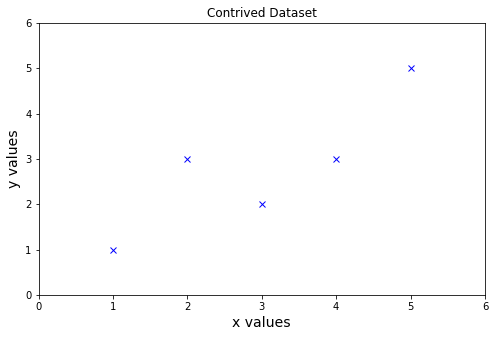

In [3]:
xs =[]
ys = []
for d in dataset:
    x = d[0]
    y = d[1]
    xs = xs + [x]
    ys = ys + [y]


plt.figure(figsize=(8,5))    
plt.axis([min(xs)-1, max(xs)+1, min(ys)-1, max(ys)+1])  
plt.title('Contrived Dataset')
plt.xlabel('x values', fontsize=14)
plt.ylabel('y values', fontsize=14)

plt.plot(xs, ys, 'bx')

plt.show

In [4]:

# Example of Estimating Mean and Variance
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

# calculate mean and variance
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))


x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


The covariance of two groups of numbers describes how those numbers change together. Co-
variance is a generalization of correlation. Correlation describes the relationship between two
groups of numbers, whereas covariance can describe the relationship between two or more
groups of numbers. Additionally, covariance can be normalized to produce a correlation value.
Nevertheless, we can calculate the covariance between two variables as follows:
    
\begin{equation*}
    covariance = \sum_{i=1}^n \left( x_{i} - mean(x) \right) \times \left( y_{i} - mean(y) \right)
\end{equation*}
    

In [5]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar


We must estimate the values for two coefficients in simple linear regression. The first is B1 which
can be estimated as:

\begin{equation*}
    B1 = \frac{covariance(x, y)}{variance(x)}
\end{equation*}

We already have functions to calculate covariance() and variance(). Next, we need to
estimate a value for B0, also called the intercept as it controls the starting point of the line
where it intersects the y-axis.

\begin{equation*}
    B0 = mean(y) - B1 \times mean(x) 
\end{equation*}

Again, we know how to estimate B1 and we have a function to estimate mean(). We can
put all of this together into a function named coefficients() that takes the dataset as an
argument and returns the coefficients. We implement this in python as,

In [6]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

The simple linear regression model is a line defined by coefficients estimated from training data.
Once the coefficients are estimated, we can use them to make predictions.Below is a function named <tt>simple_linear_regression()</tt> that implements the prediction equation to make predictions on a test dataset. we will also add in a function to manage the evaluation of the predictions called <tt>evaluate_algorithm()</tt> and another function to estimate the Root Mean Squared Error (RMSE) of the predictions called <tt>rmse_metric()</tt>.

In [7]:
from math import sqrt

def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    # The coefficients
    print('Coefficients: b0 %.3f  b1 %.3f\n' % (b0, b1) )   
    return predictions

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    y_predicted = list()
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    y_predicted += predicted
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse, y_predicted


Finally, we can run the linear regression.

In [8]:
# Test simple linear regression
rmse, y_predicted = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

Coefficients: b0 0.400  b1 0.800

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


In [9]:
print(y_predicted)

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


[1, 2, 4, 3, 5]
[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]


<function matplotlib.pyplot.show(*args, **kw)>

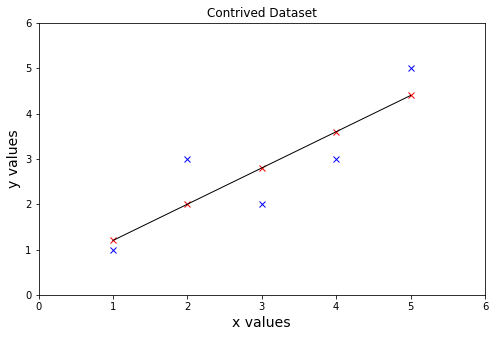

In [10]:

plt.figure(figsize=(8,5))    
plt.axis([min(xs)-1, max(xs)+1, min(ys)-1, max(ys)+1])  
plt.title('Contrived Dataset')
plt.xlabel('x values', fontsize=14)
plt.ylabel('y values', fontsize=14)

plt.plot(xs, ys, 'bx')
plt.plot(xs, y_predicted, 'rx')
plt.plot([xs[0], xs[-1]], [y_predicted[0], y_predicted[-1]], 'k-', lw=1)

print(xs)
print(y_predicted)

plt.show

### Compare with Scikit Learn LinearRegression

In theory... we should be able to test our linear egression implementation with the version implemented in the excellent scikit-learn libraries. If our implememntation is correct then we should get identical results, right ? Let's test it...!

In [11]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[0.8]]
Mean squared error: 0.48
Root Mean squared error: 0.69
Variance score: 0.73


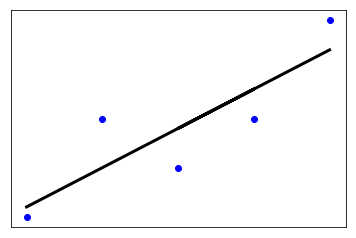

In [12]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Convert dataset lists to numpy arays
xsa = np.array(xs).reshape(len(xs), 1);
ysa = np.array(ys).reshape(len(ys), 1);

# Train the model using the training sets
regr.fit(xsa, ysa)

# Make predictions using the testing set
y_pred = regr.predict(xsa)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ysa, y_pred))
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(ysa, y_pred)))


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ysa, y_pred))

# Plot outputs
plt.scatter(xsa, ysa,  color='blue')
plt.plot(xsa, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Success! So the results of the scikit learn implemenation match those of our own linear regression algorithm, thereby proving that our implementation from scratch is correct.

## Multi-Variate Linear Regression